# Bootstrap

## Bootstraping scheme

1. Take a bootstarp sample - a random sample taken with replacement from the original sample, of the same size as the original sample.

2. Calculate the bootstrap statistic - a statistic such as mean, median, proportion, etc.. computed on the bootstrap samples.

3. Repeat steps (1) and (2) many times to create a bootstrap distribution - a distribution of bootstrap statistics.

### Generate bootstrap distribution for median

When building a bootstrap distribution for a single statistic, we first generate a series of bootstrap resamples, and then record the relevant statistic (in this case, the median) of each distribution.

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# bootstrap functions
from Funciones import bootstrap

In [2]:
df = pd.read_csv('manhattan.csv', header = 0)

In [3]:
# bootstrap samples
bs_median  = bootstrap.draw_bs_reps(df['rent'].values, np.median, size = 100)
bs_median.shape

(100,)

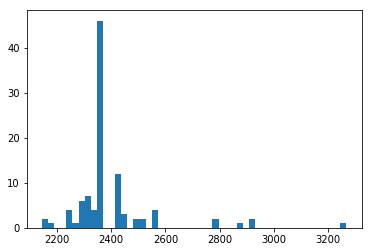

In [4]:
# visualizamos
plt.hist(bs_median, bins=50)
plt.show()

## Percentile and standard error for bootstrap confidence intervals

En el gráfico anterior tenemos una representación de cada una de las medianas calculadas realizando *bootstraping*. Recordamos que un bootstrap sample es un conjunto de datos del mismo tamaño que el original, cuyos datos se obtienen del original con reemplazo.

Usando la *distribución* de datos procedente del *bootstraping*, podemos calcular el intervalo de confianza de dos formas distintas.

### Intervalos de confianza mediante los percentiles

Seleccionamos los percentiles 5th y 97.5th de la distribución *bootstrap* para obtener hasta el 95% de la información.

### Intervalos de confianza mediante SE

Para calcular SE (standard error) simplemente calculamos la desviación estándar de la distribución *bootstrap*.

In [23]:
# percentile method
error01, error02 = np.percentile(bs_median, q=[0.05, 97.5])

In [22]:
# standard error method

# valor crítico
t_star = ss.t.ppf(q=0.975, df=df.shape[0] - 1)

# interval
error = np.std(bs_median)

error0 = np.median(bs_median) + t_star * error
error1 = np.median(bs_median) - t_star * error

# view
print(error0)
print(error1)

2678.9845627536315
2021.0154372463687


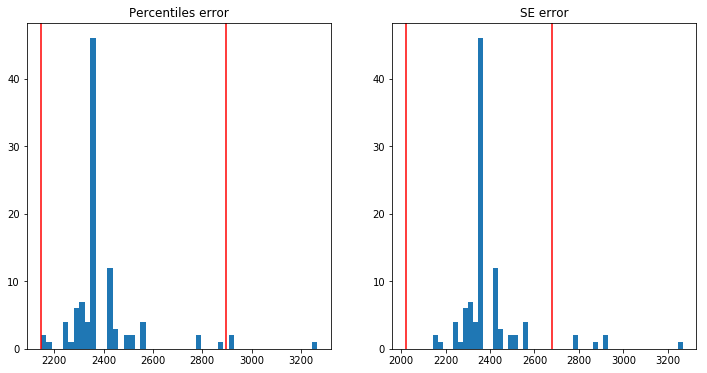

In [27]:
# visualizamos
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Percentiles error")
plt.hist(bs_median, bins=50)
plt.axvline(x=error01, color='red')
plt.axvline(x=error02, color='red')

plt.subplot(1,2,2)
plt.title("SE error")
plt.hist(bs_median, bins=50)
plt.axvline(x=error0, color='red')
plt.axvline(x=error1, color='red')
plt.show()